In [1]:
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

# 1 Data

In [17]:
personas = pd.read_csv('..\\..\\Datos\\working\\personas_cotizacion2.csv',encoding = "ISO-8859-1")
personas.head(2)


,Unnamed: 0,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,...,nro_cot_estu,nro_proyectos,rut,sexo,tipo_cliente,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge
0,0,True,True,True,False,True,True,True,False,True,...,0.0,2.0,000.000.000-0,Femenino,Natural,0.0,1.0,1.0,0.0,0.0
1,1,True,True,True,False,False,True,True,False,False,...,0.0,1.0,1.462.558-5,Masculino,Natural,0.0,0.0,0.0,1.0,0.0


In [18]:
print(personas.shape)
# print(personas.columns)
drop_columns = [personas.columns[0], 'rut', 'negocio', 'max_rango_edad']

p_negocio = personas.negocio
personas = personas.drop(drop_columns, axis=1)

print(personas.shape)
print(p_negocio.shape)

personas = pd.get_dummies(personas)

print(personas.shape)
# personas.describe()

(6184, 33)
(6184, 29)
(6184,)
(6184, 44)


In [19]:
# Check the data set
print("Tamaño Total: ",personas.shape)
print("Personas que hicieron Negocio: ",p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ",p_negocio[p_negocio == False].shape)

Tamaño Total:  (6184, 44)
Personas que hicieron Negocio:  (1101,)
Personas que no Hicieorn Negocio:  (5083,)


# 2 Unsupervised Learning

## 2.1 Dim Reduction

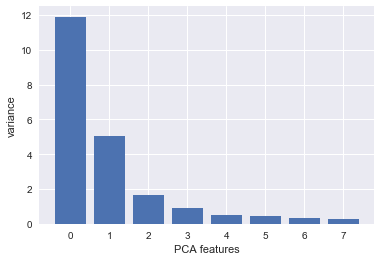

In [20]:
from sklearn.decomposition import PCA
#check variance
pca = PCA(n_components = 8)
pca.fit(personas)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA features')
plt.show()

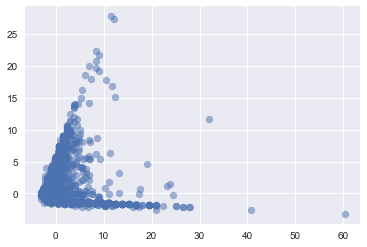

In [21]:
pca = PCA(n_components = 2)
pca.fit(personas)
transformed = pca.transform(personas)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,alpha=0.5)
plt.show()

## 2.2 KMeans

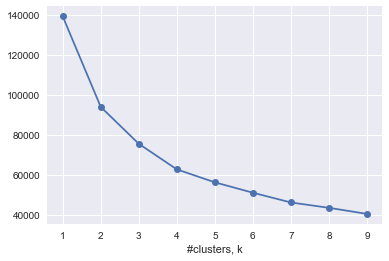

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []
scaler = StandardScaler()

# for k in ks:
#     model = KMeans(n_clusters=k)
#     pipeline = make_pipeline(scaler,model)
#     pipeline.fit(personas)
#     inertias.append(pipeline.named_steps['kmeans'].inertia_)
 
for k in ks:
    model = KMeans(n_clusters=k)
#     pipeline = make_pipeline(scaler,model)
    model.fit(personas)
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias, '-o')
plt.xlabel('#clusters, k')
plt.xticks(ks)
plt.show()

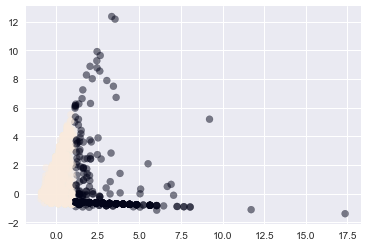

In [35]:
#Clustering

scaler = StandardScaler()

km = KMeans(n_clusters=2, max_iter=300, random_state=None)
km.fit(personas)

# pipeline = make_pipeline(scaler,km)
# pipeline.fit(personas)

# clusters = km.fit_predict(personas)
# personas['cluster'] = pipeline.fit_predict(personas)
personas['km_cluster'] = km.fit_predict(personas)

# Principal Component Analysis
pca = PCA(n_components=2, whiten=True)
pca.fit(personas)

xs = pca.fit_transform(personas)[:, 0]
ys = pca.fit_transform(personas)[:, 1]

plt.scatter(xs, ys, c=personas['km_cluster'],alpha=0.5)
plt.show()


In [34]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'personas': personas['km_cluster'], 'negocio': p_negocio})

# Create crosstab: ct
ct = pd.crosstab(df['personas'],df['negocio'])

# Display ct
print(ct)

negocio   False  True 
personas              
0           227    428
1          4856    673


In [31]:
personas.groupby('cluster').mean()

,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,is_telefono,...,loc_provincia_Otro,loc_provincia_Santiago,loc_region_Bio-Bio,loc_region_Metropolitana,loc_region_Otro,sexo_Femenino,sexo_Masculino,sexo_Sin Información,tipo_cliente_Jurídico,tipo_cliente_Natural
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.981679,1.000000,0.491603,0.410687,1.0,1.0,0.554198,0.567939,0.120611,...,0.074809,0.044275,0.908397,0.044275,0.047328,0.331298,0.664122,0.00458,0.000000,1.000000
1,0.995659,0.962018,0.996383,0.181226,0.108880,1.0,1.0,0.296980,0.339844,0.118466,...,0.066377,0.038524,0.930548,0.039971,0.029481,0.406764,0.570266,0.02297,0.004883,0.995117


## 2.2 TSNE

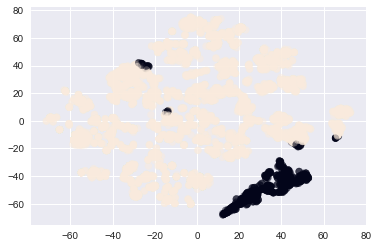

In [36]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, max_iter=300, random_state=None)
personas['tsne_cluster'] = km.fit_predict(personas)

from sklearn.manifold import TSNE

model = TSNE(learning_rate = 100)
transformed = model.fit_transform(personas)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=personas['tsne_cluster'],alpha=0.5)
plt.show()

In [37]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'personas': personas['tsne_cluster'], 'negocio': p_negocio})

# Create crosstab: ct
ct = pd.crosstab(df['personas'],df['negocio'])

# Display ct
print(ct)

negocio   False  True 
personas              
0           227    428
1          4856    673


In [16]:
personas.groupby('cluster').mean()

,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,is_telefono,...,loc_provincia_Otro,loc_provincia_Santiago,loc_region_Bio-Bio,loc_region_Metropolitana,loc_region_Otro,sexo_Femenino,sexo_Masculino,sexo_Sin Información,tipo_cliente_Jurídico,tipo_cliente_Natural
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.995665,0.962066,0.996387,0.181178,0.109104,1.0,1.0,0.297146,0.340137,0.118678,...,0.066474,0.038475,0.930455,0.039921,0.029624,0.406431,0.570629,0.022941,0.004877,0.995123
1,1.000000,0.981481,1.000000,0.495370,0.412037,1.0,1.0,0.555556,0.567901,0.118827,...,0.074074,0.044753,0.908951,0.044753,0.046296,0.333333,0.662037,0.004630,0.000000,1.000000
